In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns
import requests
import pickle

<ipython-input-1-aa6c7bcc2db5>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-deep")


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
def plot_count_plot_percentages(data_df, column):
  ax = sns.countplot(data=data_df, x=column, color="teal")
  ax.set(title = 'Distribución de la variable potencial de uso' )
  total = float(len(data_df[column]))
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()
def plot_hist_box(data_df, column):
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  sns.histplot(data_df[column],  kde=True, ax=axs[0]).set(title='Histograma ' + column )
  sns.boxplot(data=data_df, x=column, ax=axs[1]).set(title='Box Plot de '+column)

In [4]:
data_df = pd.read_csv('dataset_modelos.csv')
data_df

UID                                             Título  \
0     rpmr-utcd                                    SECOP Integrado   
1     3ckf-c5rb                             ACTIVOS DE INFORMACIÓN   
2     wc8n-eret                                HOMICIDIO COLECTIVO   
3     edj9-m7r2  Barrios, veredas y Centros Poblados Municipio ...   
4     d456-rp3x  Presidentes Juntas de Acciones  Comunales  Are...   
...         ...                                                ...   
7164  xp4k-3uzh    Mapa del Suelo Rural del Municipio de La Dorada   
7165  tabw-jh7d  VISTA_SECOP II - Procesos de Contratación de l...   
7166  jivg-vb7u  Guadalajara de Buga: Sector instituciones educ...   
7167  4dwi-btfc  USUARIOS DE LA EMPRESA DE SERVICIOS PÚBLICOS D...   
7168  qsrc-b3k4  Solicitudes de restitución según mes de presen...   

     Tipo de activo                               Suministró los datos  \
0           dataset                          Colombia Compra Eficiente   
1           dataset  Todas las dependencias de la Alcaldía Municipa...   
2           dataset                     Ministerio de Defensa Nacional   
3           dataset                             Coordinación de SISBEN   
4           dataset                                  Alcaldía de Yopal   
...             ...                                                ...   
7164            map                             MUNICIPIO DE LA DORADA   
7165         filter                          Colombia Compra Eficiente   
7166          chart          Alcaldía Municipal de Guadalajara de Buga   
7167            map                           Alcaldía de Granada Meta   
7168          chart  UNIDAD ADMINISTRATIVA ESPECIAL DE GESTIÓN DE R...   

      Calificación media                         Categoría  \
0                      0            Gastos Gubernamentales   
1                      0  Ciencia, Tecnología e Innovación   
2                      0                               NaN   
3                      0          Ordenamiento Territorial   
4                      0           Participación ciudadana   
...                  ...                               ...   
7164                   0          Ordenamiento Territorial   
7165                   0            Gastos Gubernamentales   
7166                   0                         Educación   
7167                   0          Ordenamiento Territorial   
7168                   0    Agricultura y Desarrollo Rural   

      Fecha de creación [unixtime]  \
0                       1546971653   
1                       1571870887   
2                       1656953024   
3                       1557157815   
4                       1523616291   
...                            ...   
7164                    1502231204   
7165                    1648583737   
7166                    1652904719   
7167                    1502397193   
7168                    1477064334   

                                            Descripción  \
0     Información integrada de los procesos de compr...   
1     BASE DE DATOS PARA LA GESTIÓN DE RIESGOS DE SE...   
2     Se entiende como aquellos hechos en los cuales...   
3     Barrios, veredas y Centros Poblados Municipio ...   
4     Directorio de presidentes  de  juntas  de acci...   
...                                                 ...   
7164  Ubicación geográfica del  Suelo Rural del Muni...   
7165  Registro de los procesos de compra, sean o no ...   
7166  Guadalajara de Buga cuenta actualmente con 14 ...   
7167  En este conjunto de datos encontrará informaci...   
7168  Número de solicitudes de inscripción al SRTDAF...   

           Tipo de visualización  Descargas ID de licencia  Comentarios  \
0                          table      28129    CC_40_BY_SA            8   
1                          table         70    CC_40_BY_SA            0   
2                          table         49            NaN            0   
3                          table        257    CC_40_BY_ND            0

Revisión variable coeficiente (CTR) Usabilidad:

In [5]:
def create_ctr(x):
  if x['Vistas']==0:
    x['tasa_descargas_normalizado']=0
  else:
    x['tasa_descargas_normalizado']=x['Descargas']/x['Vistas']
  if x['tasa_descargas_normalizado']>1:
    x['tasa_descargas_normalizado']=1
  return x


In [6]:
cleaned_data_df = data_df.copy()
cleaned_data_df= cleaned_data_df.apply(create_ctr,axis=1)

In [7]:
cleaned_data_df

UID                                             Título  \
0     rpmr-utcd                                    SECOP Integrado   
1     3ckf-c5rb                             ACTIVOS DE INFORMACIÓN   
2     wc8n-eret                                HOMICIDIO COLECTIVO   
3     edj9-m7r2  Barrios, veredas y Centros Poblados Municipio ...   
4     d456-rp3x  Presidentes Juntas de Acciones  Comunales  Are...   
...         ...                                                ...   
7164  xp4k-3uzh    Mapa del Suelo Rural del Municipio de La Dorada   
7165  tabw-jh7d  VISTA_SECOP II - Procesos de Contratación de l...   
7166  jivg-vb7u  Guadalajara de Buga: Sector instituciones educ...   
7167  4dwi-btfc  USUARIOS DE LA EMPRESA DE SERVICIOS PÚBLICOS D...   
7168  qsrc-b3k4  Solicitudes de restitución según mes de presen...   

     Tipo de activo                               Suministró los datos  \
0           dataset                          Colombia Compra Eficiente   
1           dataset  Todas las dependencias de la Alcaldía Municipa...   
2           dataset                     Ministerio de Defensa Nacional   
3           dataset                             Coordinación de SISBEN   
4           dataset                                  Alcaldía de Yopal   
...             ...                                                ...   
7164            map                             MUNICIPIO DE LA DORADA   
7165         filter                          Colombia Compra Eficiente   
7166          chart          Alcaldía Municipal de Guadalajara de Buga   
7167            map                           Alcaldía de Granada Meta   
7168          chart  UNIDAD ADMINISTRATIVA ESPECIAL DE GESTIÓN DE R...   

      Calificación media                         Categoría  \
0                      0            Gastos Gubernamentales   
1                      0  Ciencia, Tecnología e Innovación   
2                      0                               NaN   
3                      0          Ordenamiento Territorial   
4                      0           Participación ciudadana   
...                  ...                               ...   
7164                   0          Ordenamiento Territorial   
7165                   0            Gastos Gubernamentales   
7166                   0                         Educación   
7167                   0          Ordenamiento Territorial   
7168                   0    Agricultura y Desarrollo Rural   

      Fecha de creación [unixtime]  \
0                       1546971653   
1                       1571870887   
2                       1656953024   
3                       1557157815   
4                       1523616291   
...                            ...   
7164                    1502231204   
7165                    1648583737   
7166                    1652904719   
7167                    1502397193   
7168                    1477064334   

                                            Descripción  \
0     Información integrada de los procesos de compr...   
1     BASE DE DATOS PARA LA GESTIÓN DE RIESGOS DE SE...   
2     Se entiende como aquellos hechos en los cuales...   
3     Barrios, veredas y Centros Poblados Municipio ...   
4     Directorio de presidentes  de  juntas  de acci...   
...                                                 ...   
7164  Ubicación geográfica del  Suelo Rural del Muni...   
7165  Registro de los procesos de compra, sean o no ...   
7166  Guadalajara de Buga cuenta actualmente con 14 ...   
7167  En este conjunto de datos encontrará informaci...   
7168  Número de solicitudes de inscripción al SRTDAF...   

           Tipo de visualización  Descargas ID de licencia  Comentarios  \
0                          table      28129    CC_40_BY_SA            8   
1                          table         70    CC_40_BY_SA            0   
2                          table         49            NaN            0   
3                          table        257    CC_40_BY_ND            0

In [ ]:
for i in cleaned_data_df.columns:
  print(i)

UID
Título
Tipo de activo
Suministró los datos
Calificación media
Categoría
Fecha de creación [unixtime]
Descripción
Tipo de visualización
Descargas
ID de licencia
Comentarios
Procedencia
Fecha de publicación [unixtime]
Grupo de publicación
Etapa de publicación
Fecha última actualización [unixtime]
Actualizado por
Total de veces calificado
Vistas
Fecha última modificación de la vista [unixtime]
Tipo de la vista
Nombre de la licencia
Logo de la licencia
Enlace de la licencia
Municipio
Nombre entidad
Orden
Sector
Área dependencia
Departamento
Cobertura Geográfica
Idioma
Frequencia actualización
Frequencia actualización en días
Enlace documentación
Fecha de emisión (aaaa-mm-dd)
Cada fila es un
Etiquetas
Enlace de la fuente
ID del publicador
Nombre del publicador
Correo del publicador o editor
Número de columnas
Número de filas
Fecha de creación
Fecha de publicación
Fecha última actualización
Validez correo publicador
Validez quien suministró los datos
Validez nombre publicador
Validez fec

Se seleccionan los datos de entrenamiento y test. En este caso por decisión del negocio, para entrenar se usarán solo conjuntos publicados antes del 1 de Abril de 2023.

In [8]:
cleaned_data_df['Fecha de publicación'] = pd.to_datetime(cleaned_data_df['Fecha de publicación']).dt.date

<ipython-input-8-146edaa18b70>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cleaned_data_df['Fecha de publicación'] = pd.to_datetime(cleaned_data_df['Fecha de publicación']).dt.date


In [9]:
x_train=cleaned_data_df[cleaned_data_df['Fecha de publicación'] <= pd.to_datetime('2023-04-01').date()]

In [10]:
x_train.shape

(6850, 134)

In [11]:
x_test=cleaned_data_df[cleaned_data_df['Fecha de publicación'] > pd.to_datetime('2023-04-01').date()]

In [12]:
x_test.shape

(319, 134)

In [ ]:
cleaned_data_df.shape

(7169, 134)

In [13]:
num_rows_x_train = x_train.shape[0]
num_rows_to_move = int(cleaned_data_df.shape[0] * 0.2)-x_test.shape[0]
random_indices = random.sample(range(x_train.shape[0]), num_rows_to_move)
rows_to_move = x_train.iloc[random_indices]
x_train.drop(index=rows_to_move.index, inplace=True)
x_test=pd.concat([x_test,rows_to_move])


<ipython-input-13-5a91d059ed91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(index=rows_to_move.index, inplace=True)


In [14]:
x_train.shape

(5736, 134)

In [15]:
x_test.shape

(1433, 134)

In [16]:
x_test = x_test.sample(frac=1).reset_index(drop=True)


In [19]:
X = x_train.drop('tasa_descargas_normalizado', axis=1)
# X_test=x_test
y = x_train['tasa_descargas_normalizado']
X_test = x_test.drop('tasa_descargas_normalizado', axis=1)
y_test = x_test['tasa_descargas_normalizado']
# Dividir los datos en conjuntos de entrenamiento  entre entrenamiento y  validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

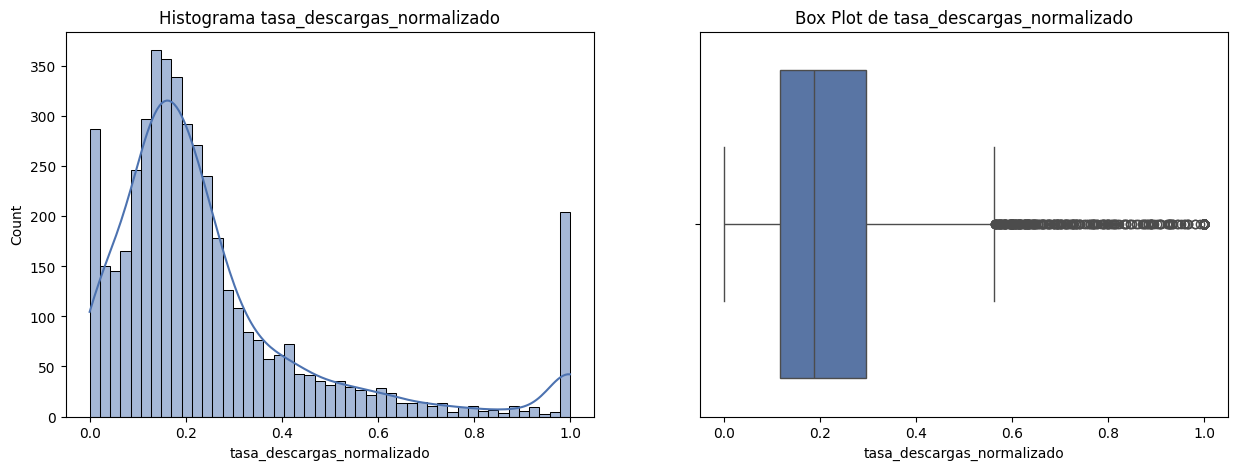

In [ ]:
plot_hist_box(X_train, 'tasa_descargas_normalizado')

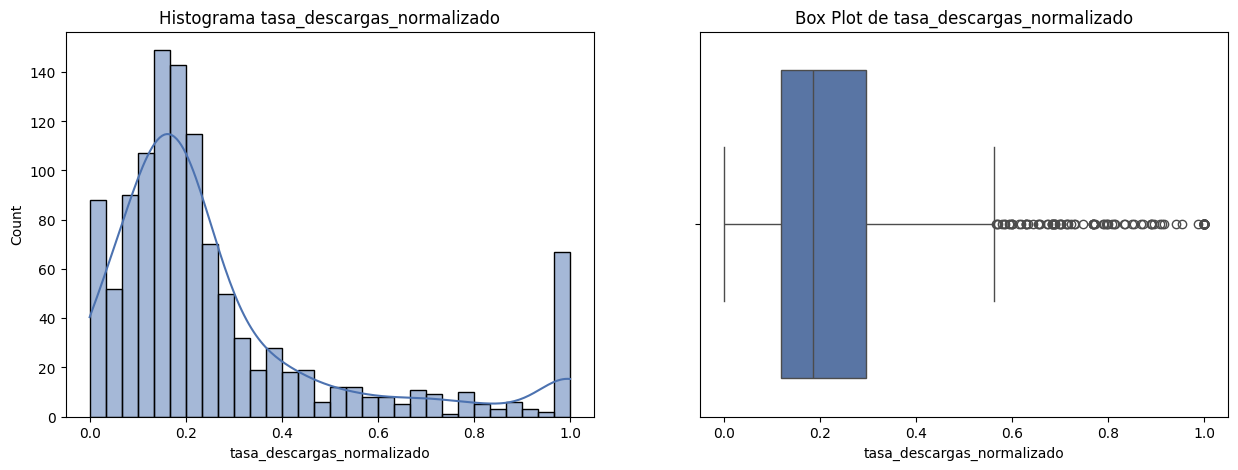

In [ ]:
plot_hist_box(X_validation, 'tasa_descargas_normalizado')

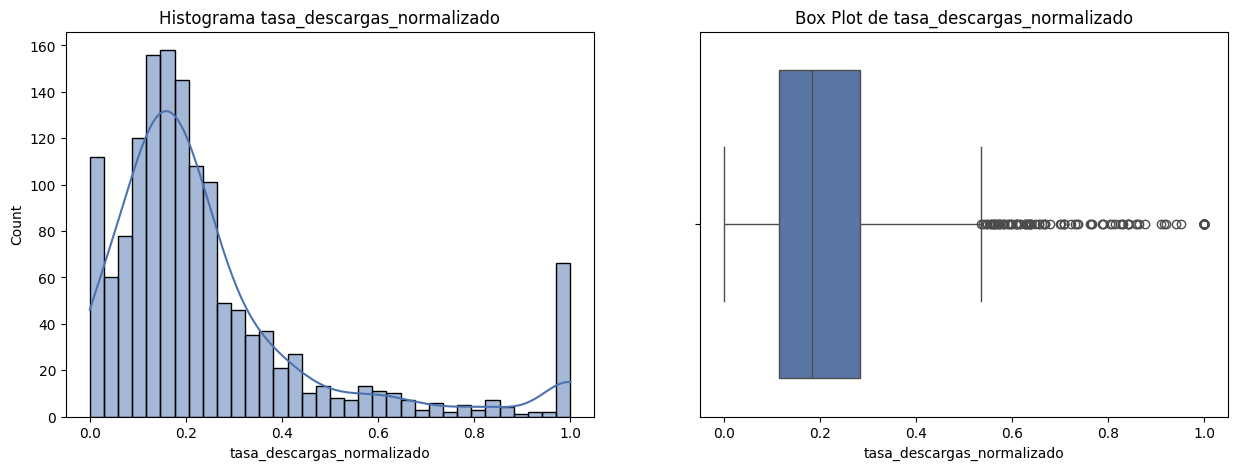

In [ ]:
plot_hist_box(X_test, 'tasa_descargas_normalizado')

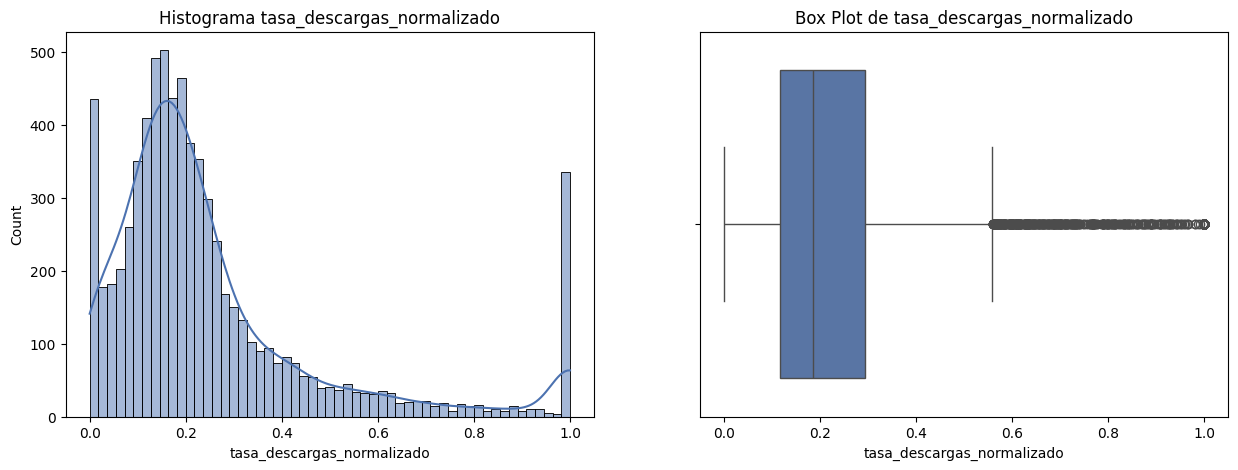

In [ ]:
plot_hist_box(cleaned_data_df, 'tasa_descargas_normalizado')

In [ ]:
X_test.shape

(1434, 133)

In [ ]:
X_train.shape

(4588, 133)

In [ ]:
X_validation.shape

(1148, 133)

# Análisis variables de entrada

In [ ]:
def seleccionar_columnas(X):
    return X[['confidencialidad',	'relevancia',	'actualidad',
                                          'trazabilidad',	'conformidad',	'exactitudSintactica',
                                          'exactitudSemantica',	'completitud',	'consistencia',
                                          'precision',	'portabilidad',	'credibilidad',
                                          'comprensibilidad',	'accesibilidad',	'eficiencia',
                                          'recuperabilidad',	'disponibilidad',	'unicidad']]

In [ ]:
X_train=seleccionar_columnas(X_train)
X_validation=seleccionar_columnas(X_validation)
X_test=seleccionar_columnas(X_test)

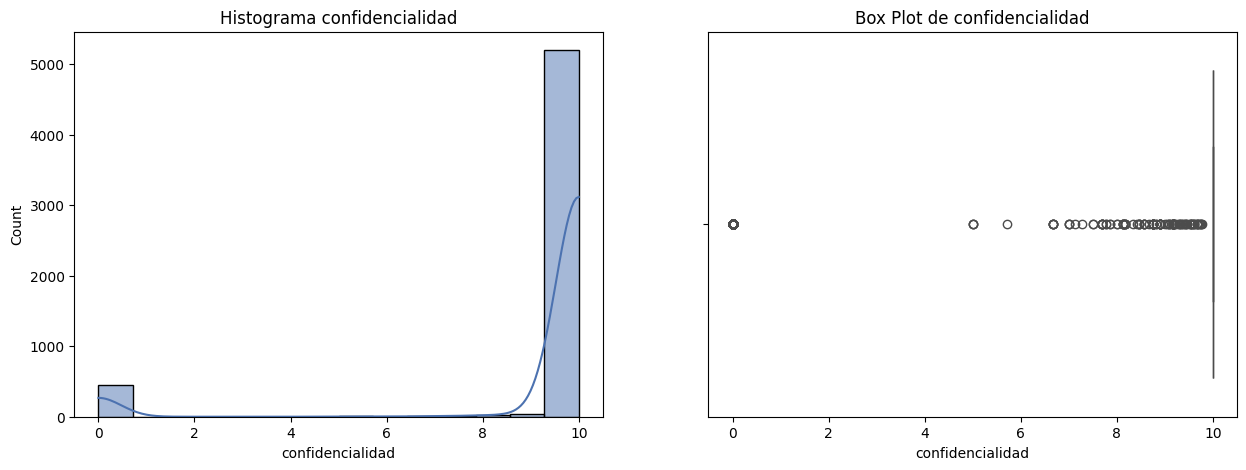

In [ ]:
plot_hist_box(x_train, 'confidencialidad')

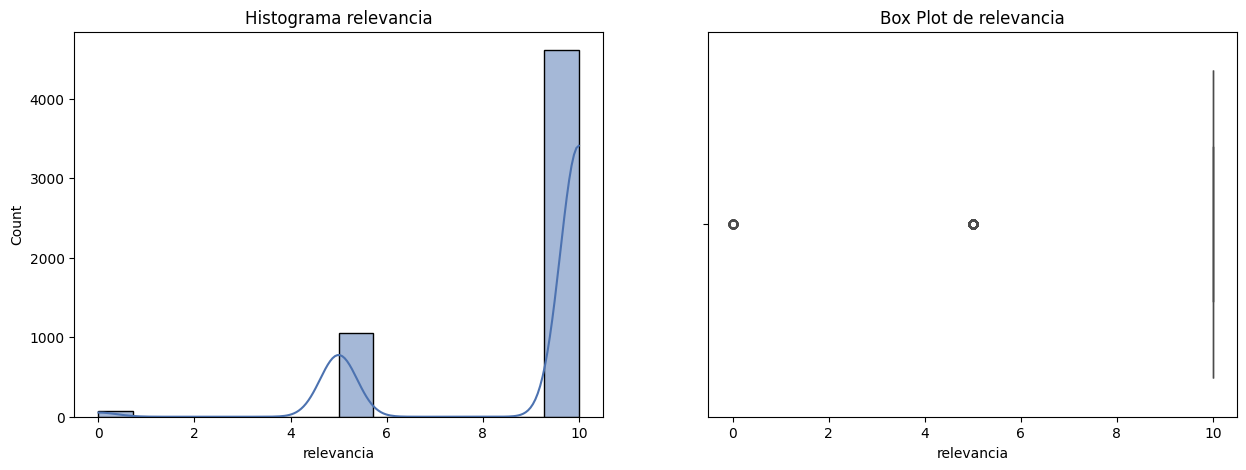

In [ ]:
plot_hist_box(x_train, 'relevancia')

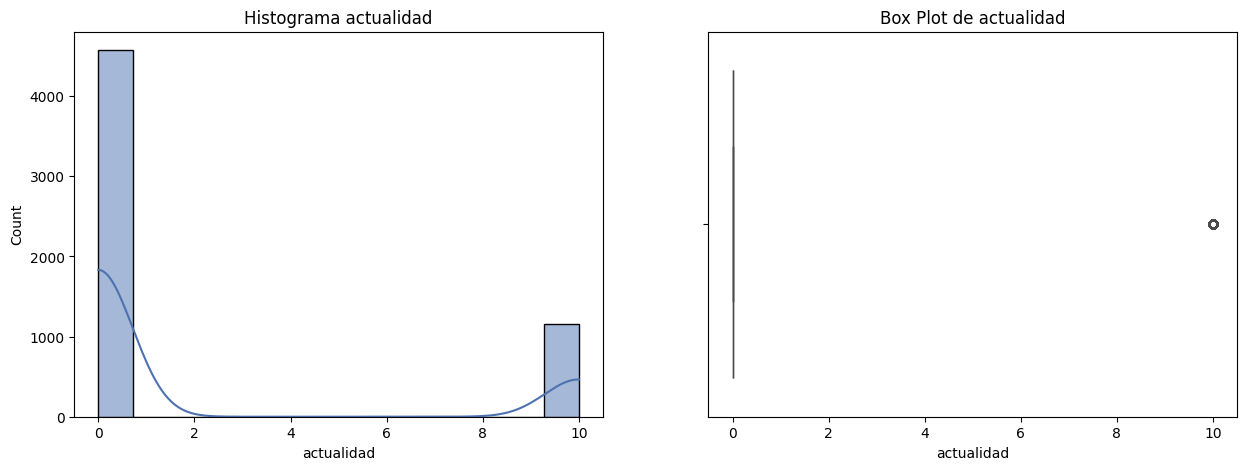

In [ ]:
plot_hist_box(x_train, 'actualidad')

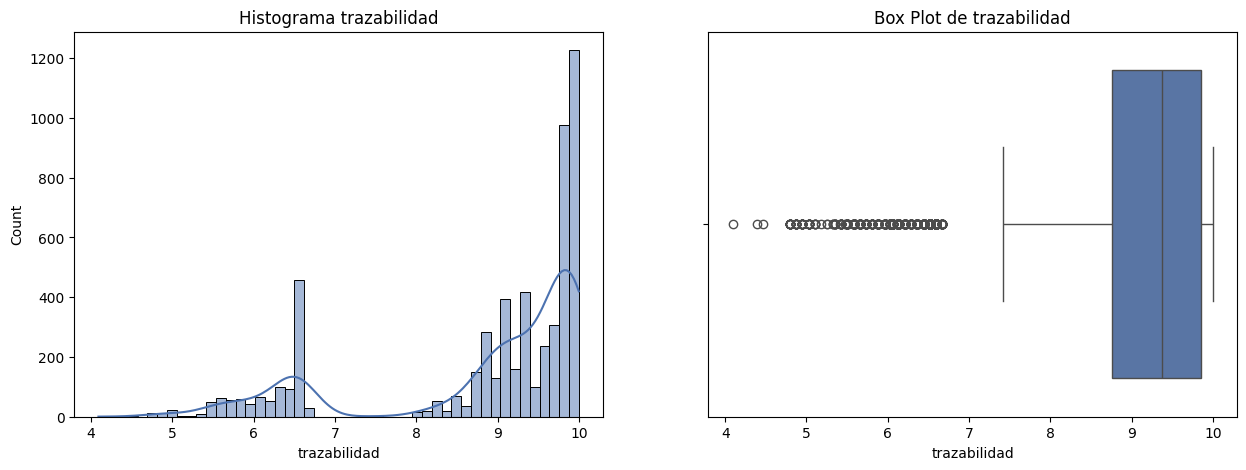

In [ ]:
plot_hist_box(x_train, 'trazabilidad')

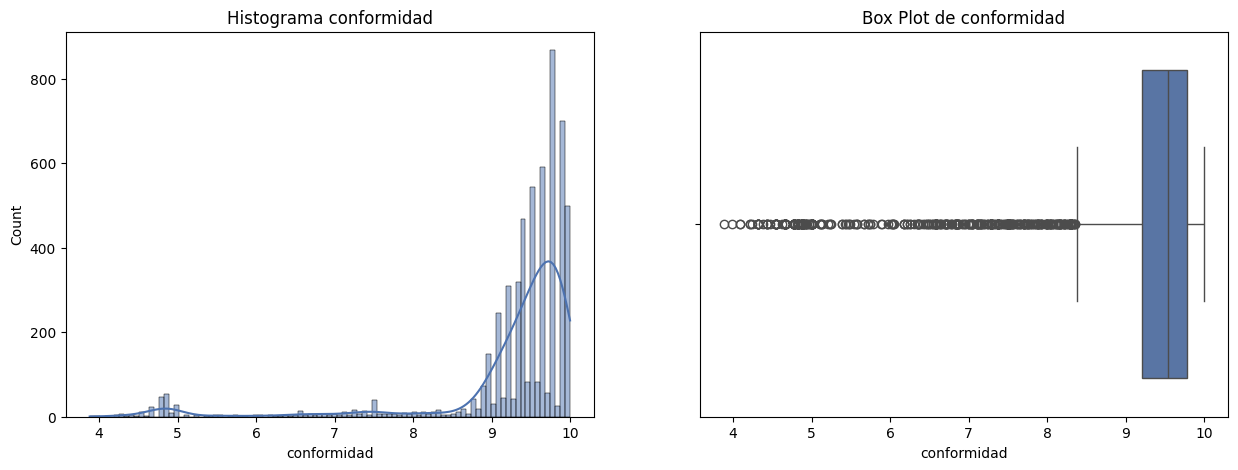

In [ ]:
plot_hist_box(x_train, 'conformidad')

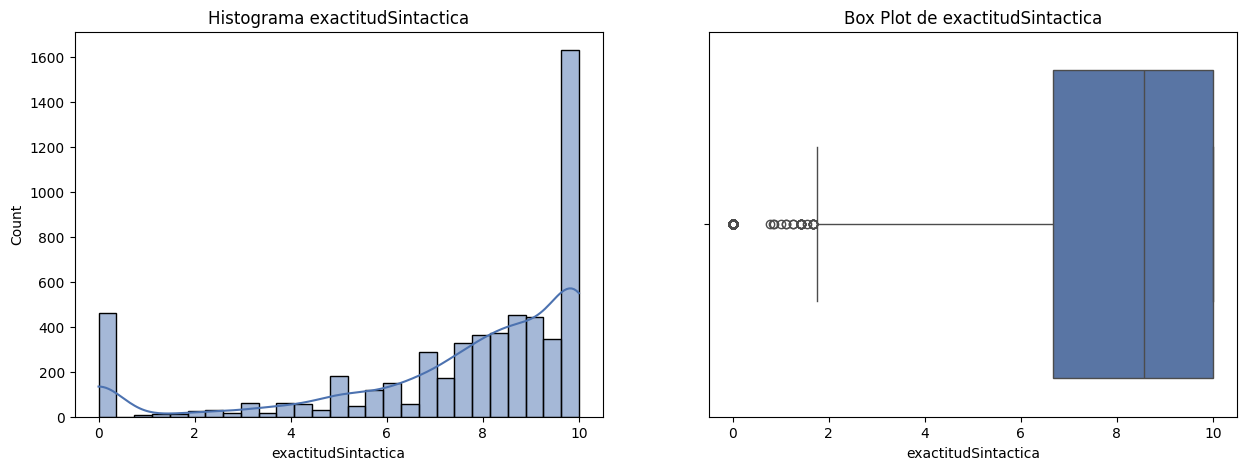

In [ ]:
plot_hist_box(x_train, 'exactitudSintactica')

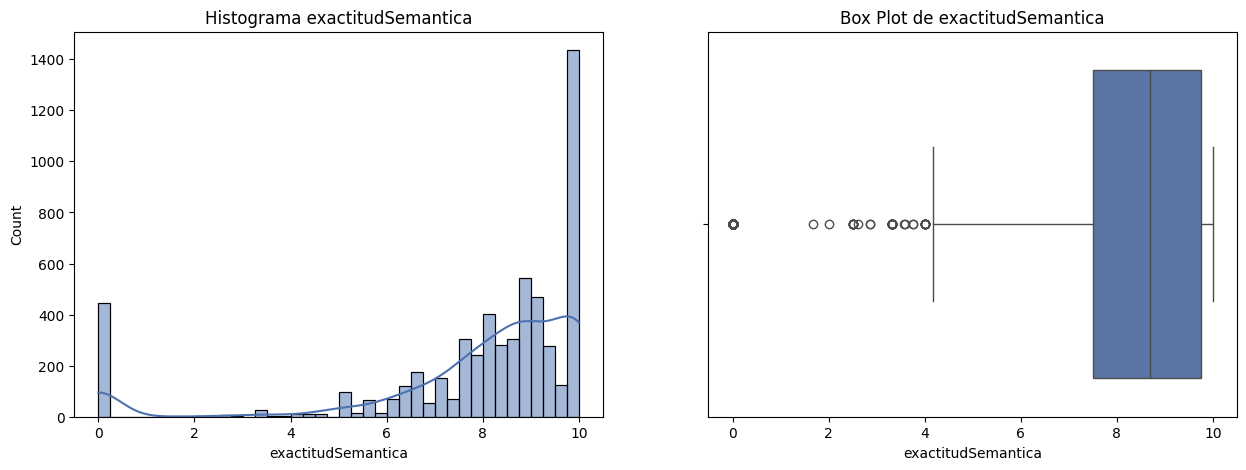

In [ ]:
plot_hist_box(x_train, 'exactitudSemantica')

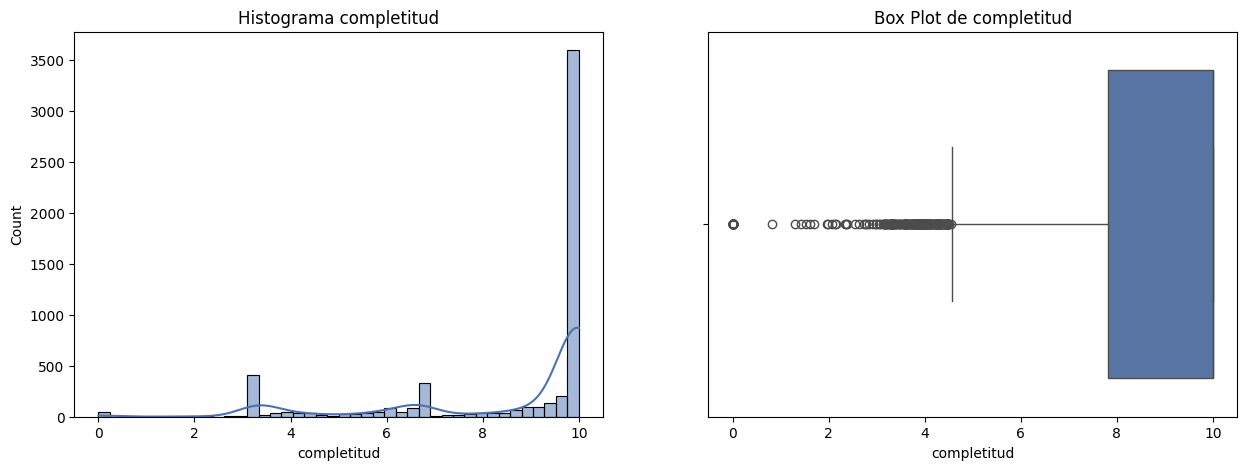

In [ ]:
plot_hist_box(x_train, 'completitud')

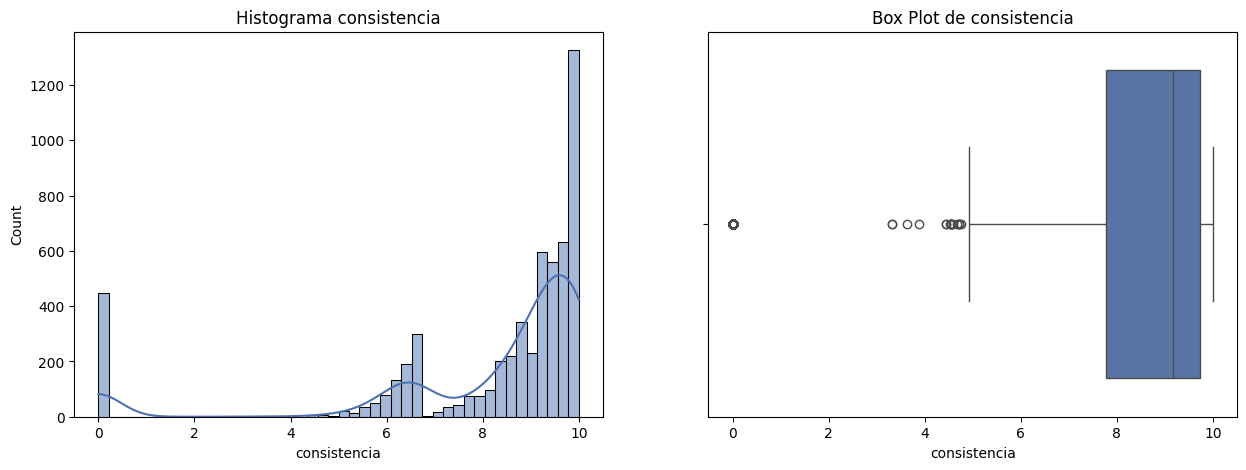

In [ ]:
plot_hist_box(x_train, 'consistencia')

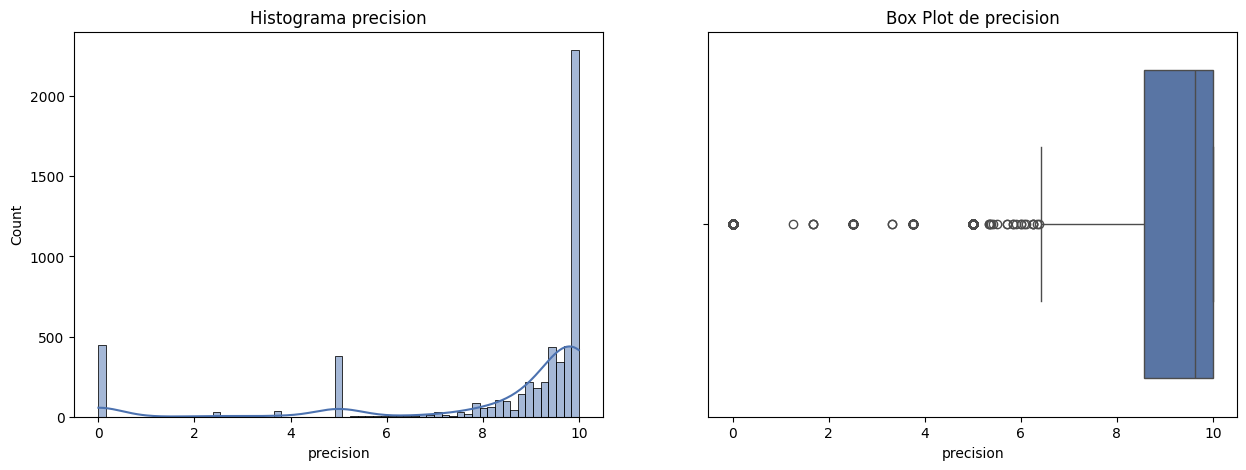

In [ ]:
plot_hist_box(x_train, 'precision')

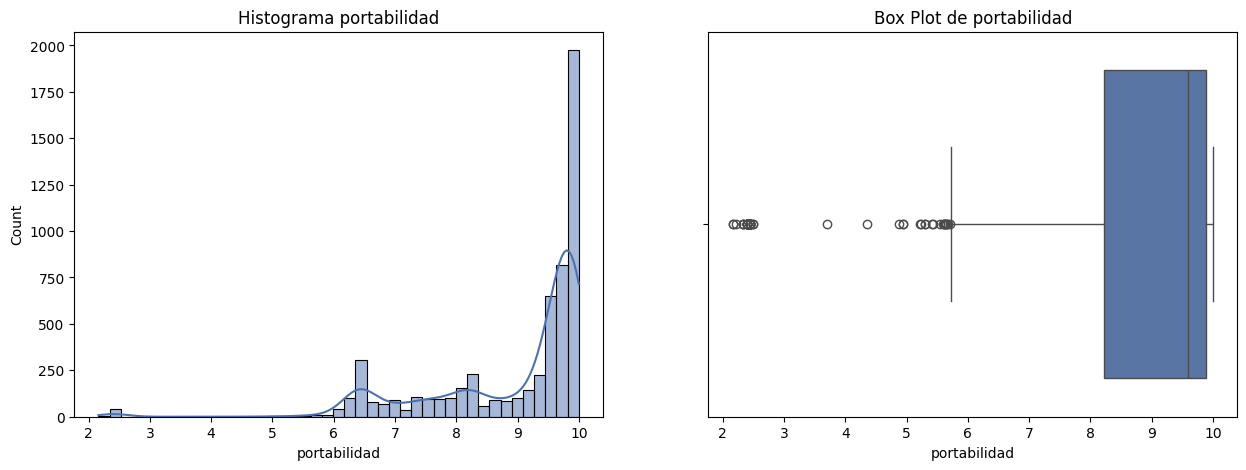

In [ ]:
plot_hist_box(x_train, 'portabilidad')

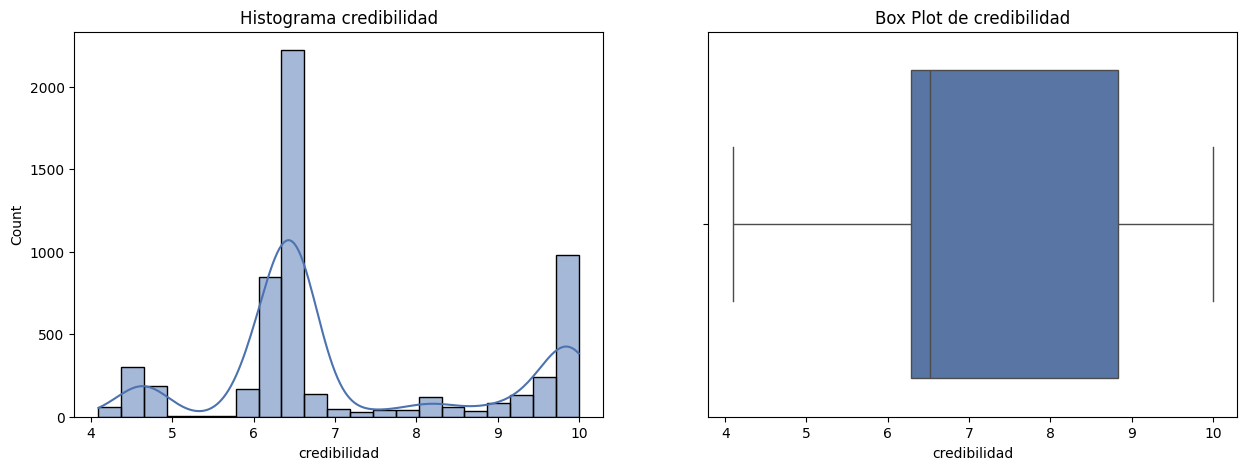

In [ ]:
plot_hist_box(x_train, 'credibilidad')


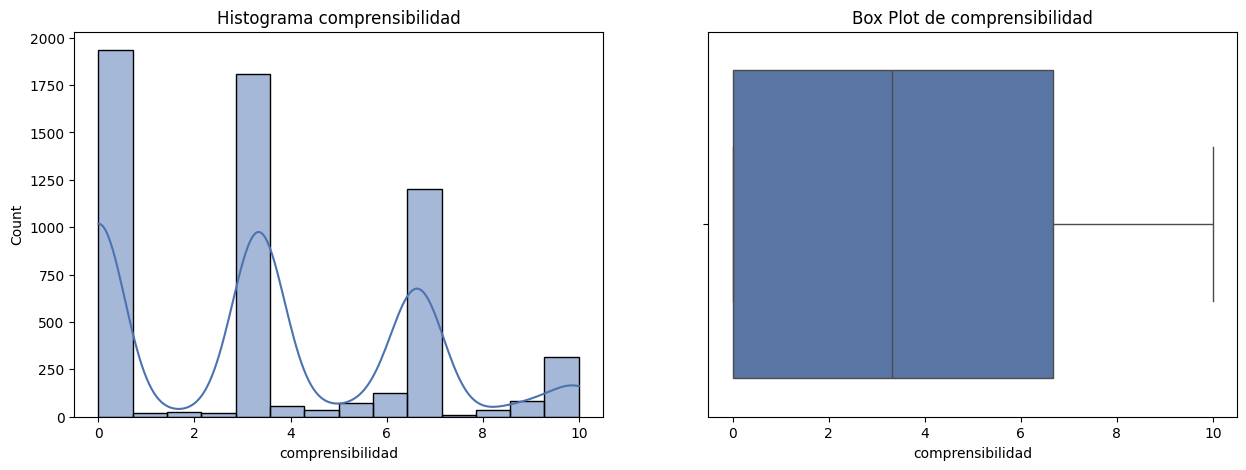

In [ ]:
plot_hist_box(x_train, 'comprensibilidad')

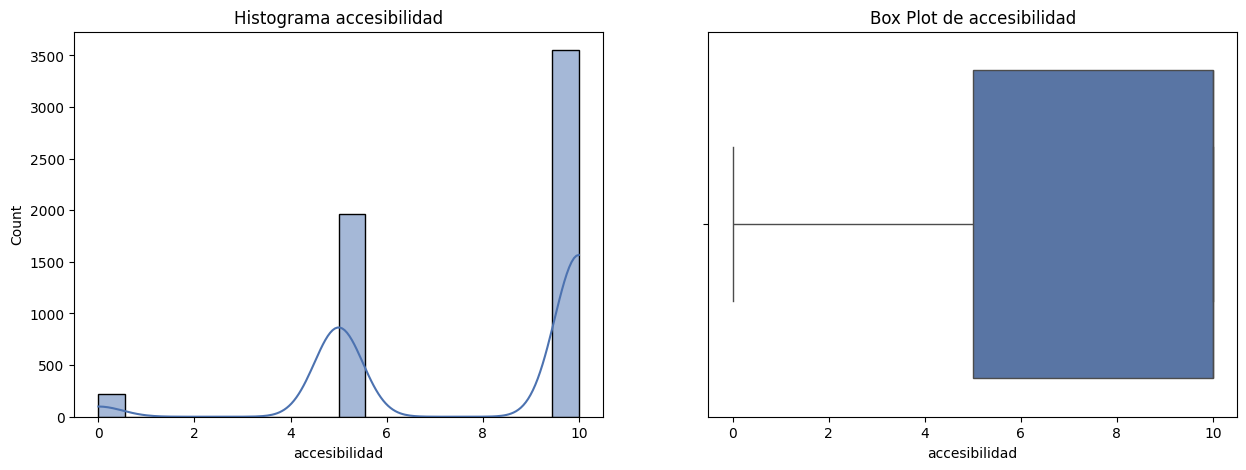

In [ ]:
plot_hist_box(x_train, 'accesibilidad')

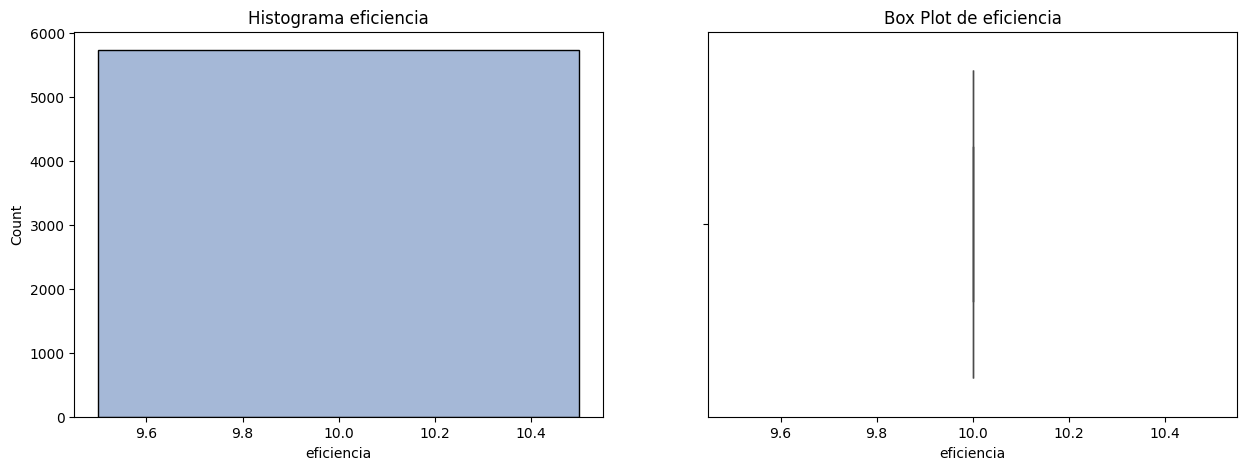

In [ ]:
plot_hist_box(x_train, 'eficiencia')

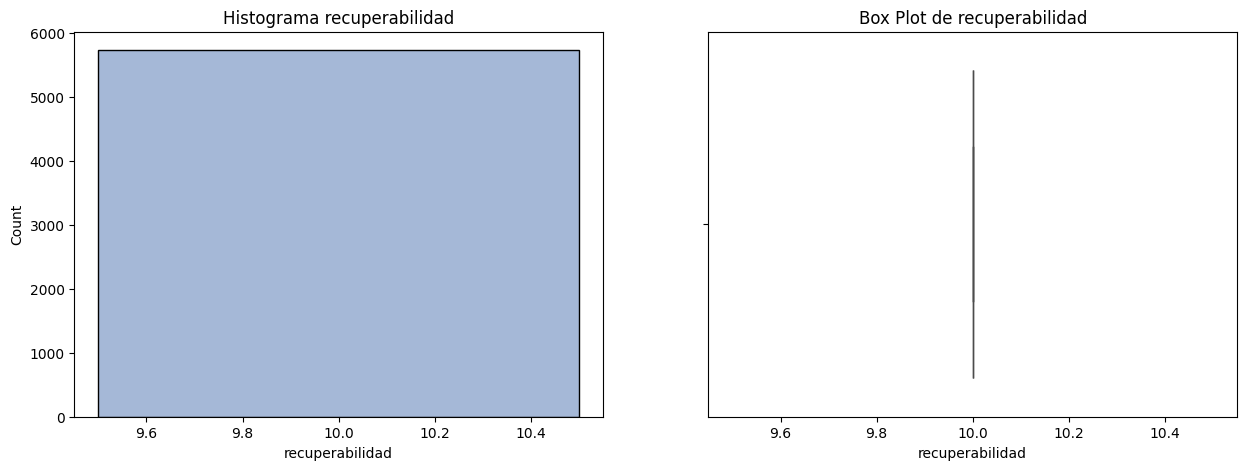

In [ ]:
plot_hist_box(x_train, 'recuperabilidad')

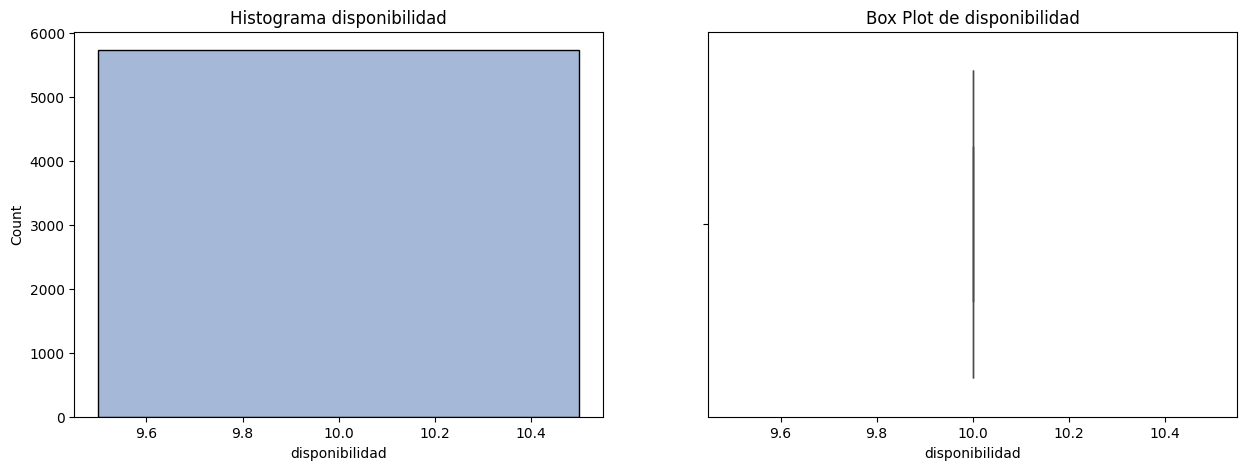

In [ ]:
plot_hist_box(x_train, 'disponibilidad')

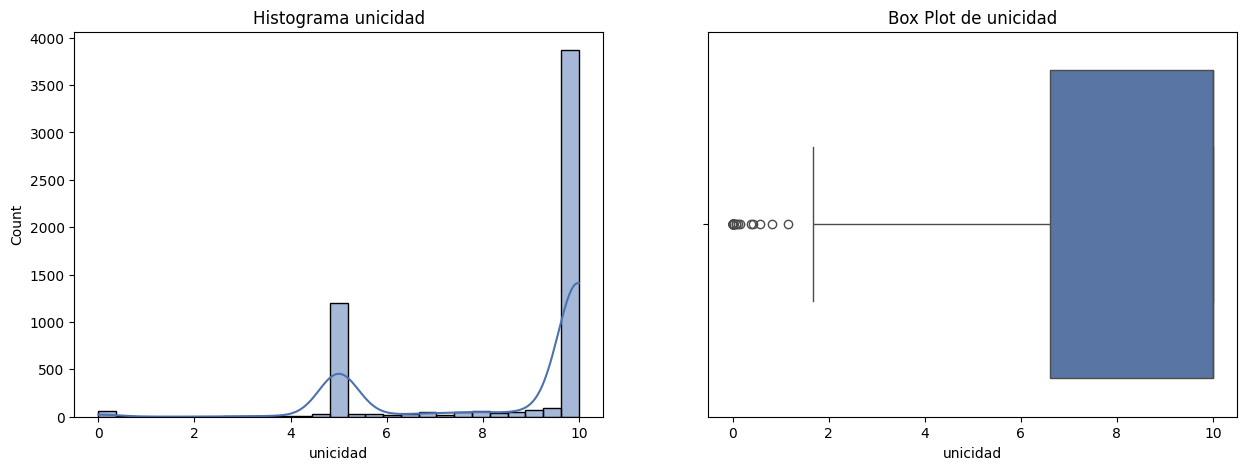

In [ ]:
plot_hist_box(x_train, 'unicidad')

<Figure size 1500x1500 with 0 Axes>

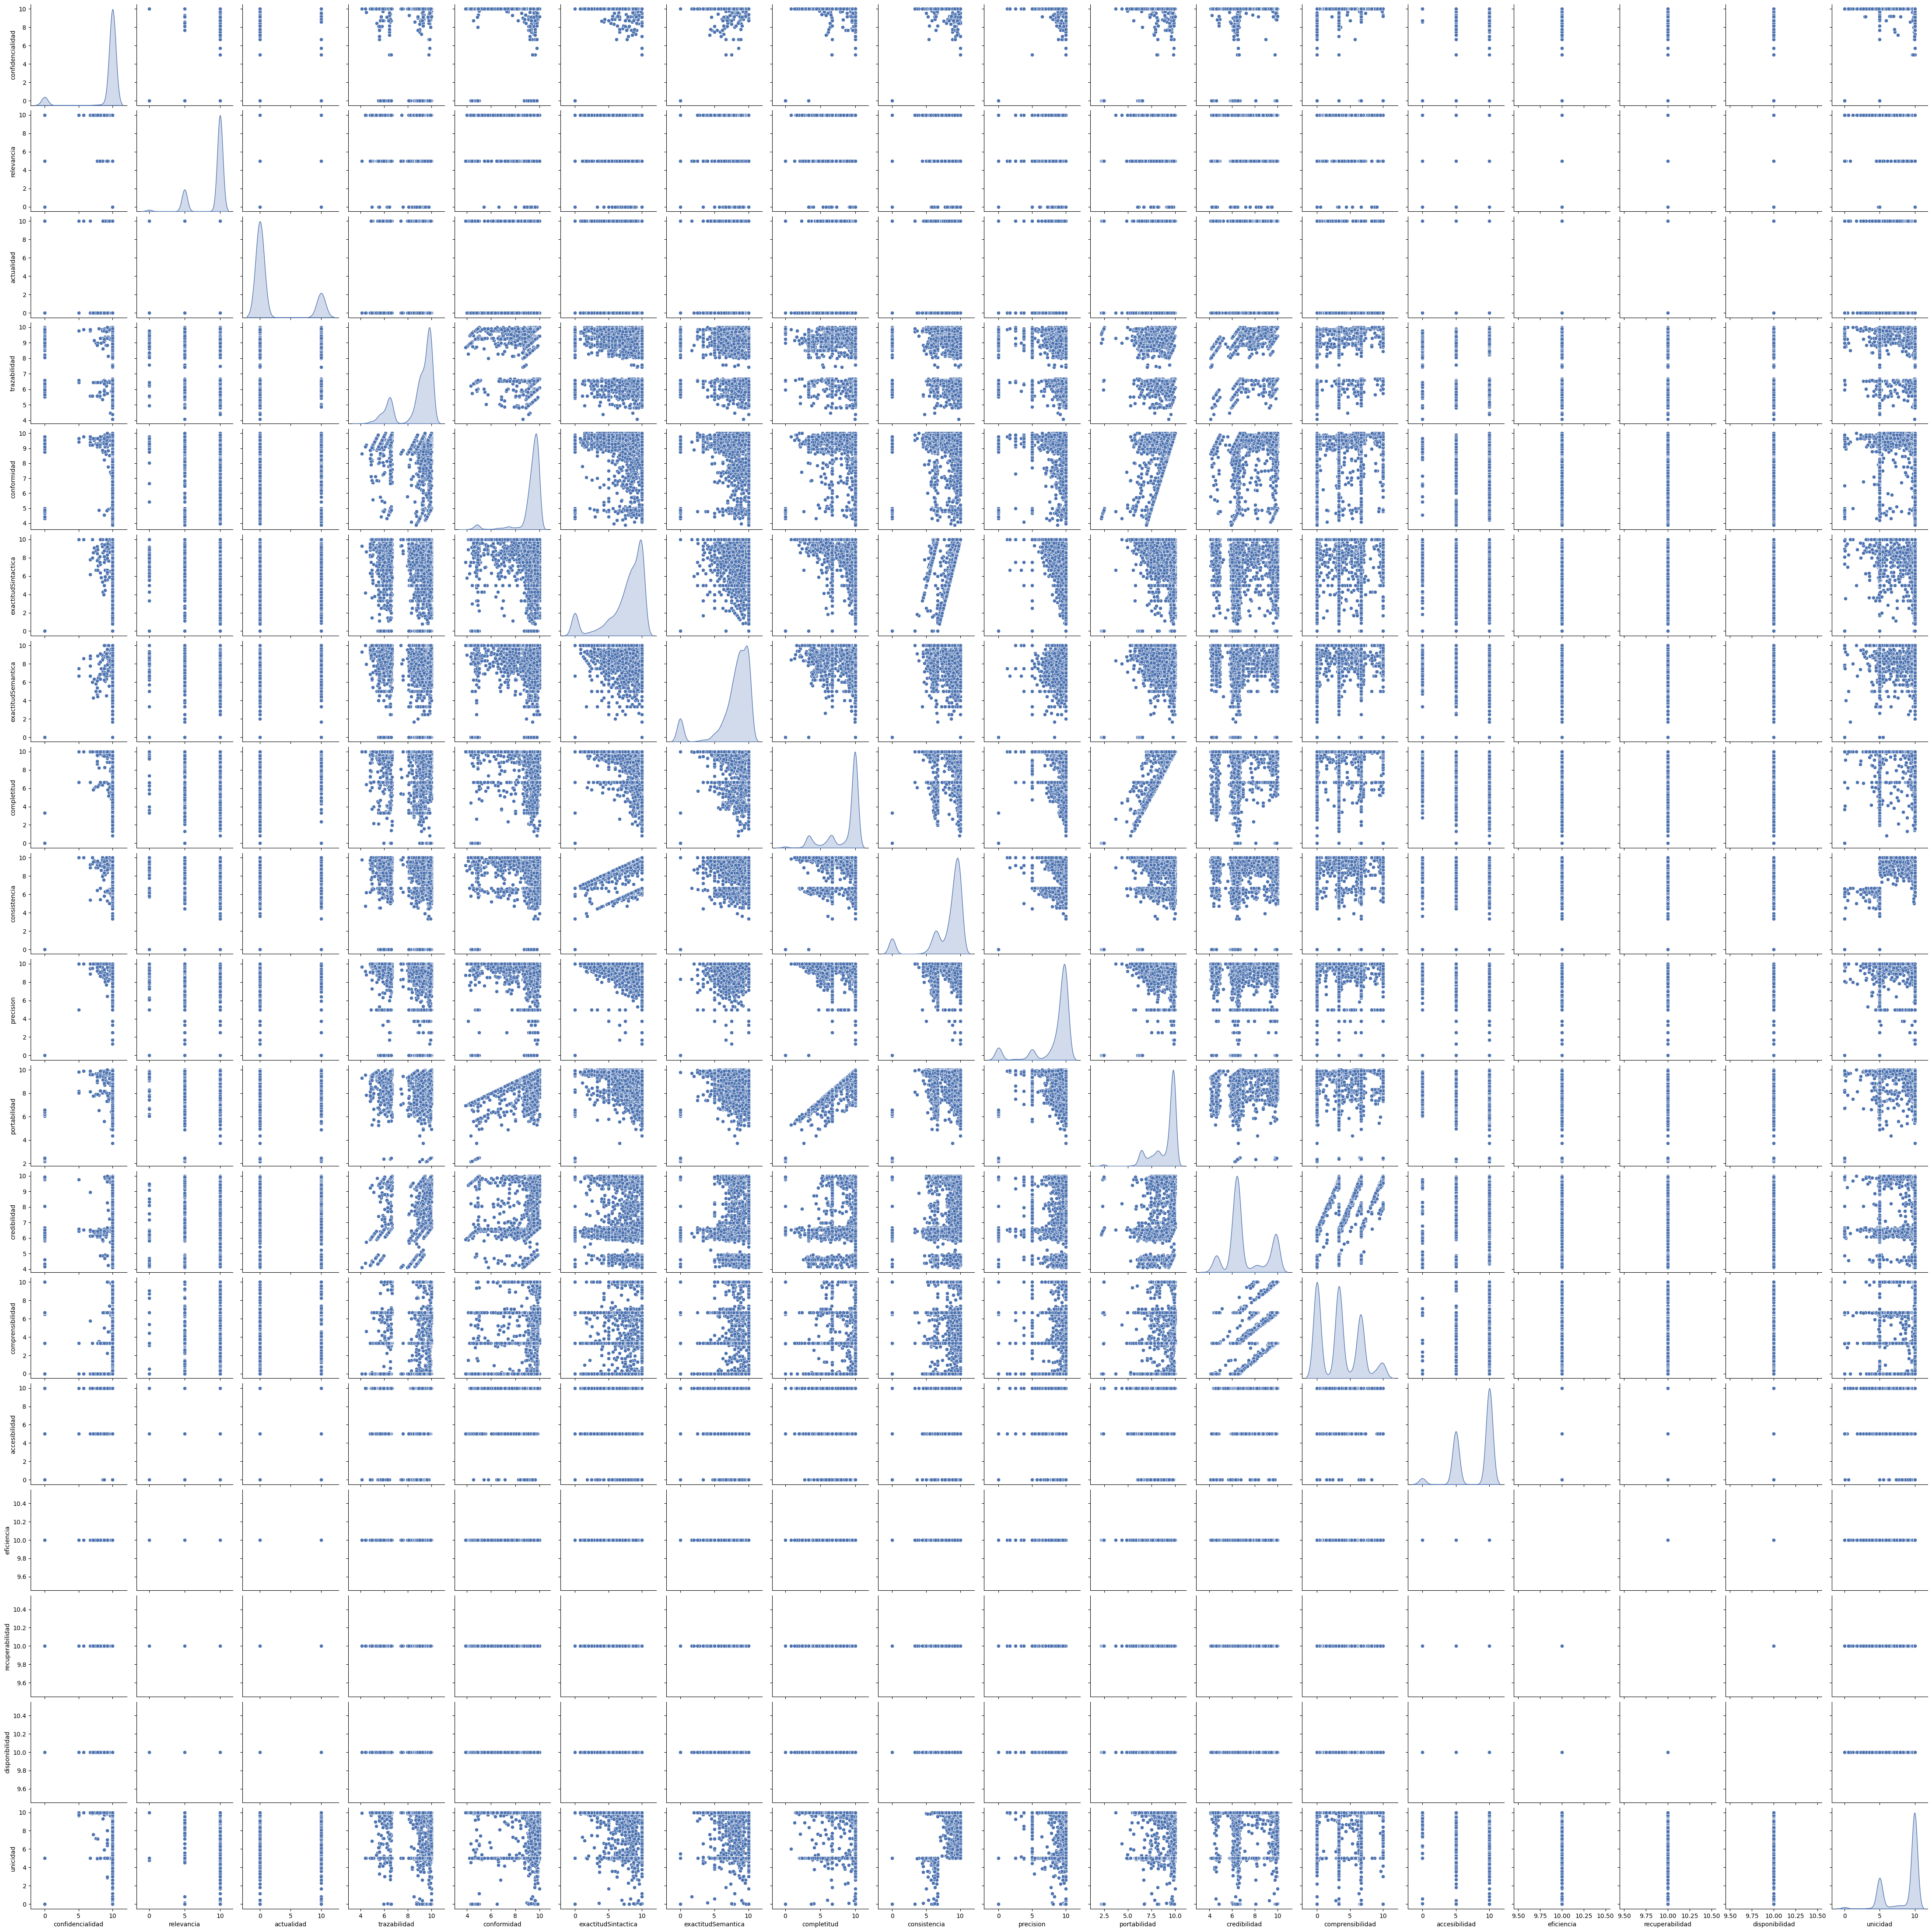

In [ ]:
plt.figure(figsize=(15, 15))
col_num=['confidencialidad',	'relevancia',	'actualidad',
                                          'trazabilidad',	'conformidad',	'exactitudSintactica',
                                          'exactitudSemantica',	'completitud',	'consistencia',
                                          'precision',	'portabilidad',	'credibilidad',
                                          'comprensibilidad',	'accesibilidad',	'eficiencia',
                                          'recuperabilidad',	'disponibilidad',	'unicidad']
sns.pairplot(x_train[col_num], diag_kind='kde')
plt.show()

Como se puede ver, las variables de eficiencia, recuperabilidad y disponibilidad son constantes para todos los conjuntos de datos. Por lo que una decisión acordada con el experto, es descartar estas variables como de entrada en el modelo. Por lo que se modifica la función de selección de columnas

In [21]:
def seleccionar_columnas(X):
    return X[['confidencialidad',	'relevancia',	'actualidad',
                                          'trazabilidad',	'conformidad',	'exactitudSintactica',
                                          'exactitudSemantica',	'completitud',	'consistencia',
                                          'precision',	'portabilidad',	'credibilidad',
                                          'comprensibilidad',	'accesibilidad',	'unicidad']]

In [22]:
X_train=seleccionar_columnas(X_train)
X_validation=seleccionar_columnas(X_validation)
X_test=seleccionar_columnas(X_test)

## Modelo base regresión lineal

In [ ]:
# Definir el pipeline de preprocesamiento con RobustScaler y un modelo de regresión lineal
pipeline = Pipeline([
    ('scaler', PowerTransformer(method='yeo-johnson')),  # Escala robusta para manejar valores atípicos
    ('regression', LinearRegression())  # Modelo de regresión lineal
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = pipeline.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))

Train
Mean Squared Error (MSE): 0.0482
Root Mean Squared Error (RMSE): 0.2196
Validation
Mean Squared Error (MSE): 0.0539
Root Mean Squared Error (RMSE): 0.2322


## Regresión lineal

In [ ]:
scalers = {
    'Yeo-Johnson': PowerTransformer(method='yeo-johnson'),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

pipeline = Pipeline([
    ('scaler', PowerTransformer(method='yeo-johnson')),
    ('regression', LinearRegression())
])

param_grid = {
    'scaler': list(scalers.values()),  # Probar diferentes escaladores
    'regression__fit_intercept': [True, False],  # Ajustar intersección
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_pipeline.predict(X_train)

print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = best_pipeline.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))

Train
Mean Squared Error (MSE): 0.0482
Root Mean Squared Error (RMSE): 0.2196
Validation
Mean Squared Error (MSE): 0.0540
Root Mean Squared Error (RMSE): 0.2324


## Regresión polinomial

In [ ]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_train)


print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = best_model.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.2s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.2s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.2s
[CV] END .......................polynomialfeatures__degree=3; total time=   1.7s
[CV] END .......................polynomialfeatures__degree=3; total time=   1.7s
[CV] END .......................polynomialfeatures__degree=3; total time=   1.7s
[CV] END .......................polynomialfeatures__degree=3; total time=   2.4s
[CV] END .......................polynomialfeatures__degree=3; total time=   2.6s
[CV] END .......................polynomialfeatures__degree=4; total time=  45.8s
[CV] END .......................polynomialfeature

## Regresión de Huber

In [ ]:
scalers = {
    'Yeo-Johnson': PowerTransformer(method='yeo-johnson'),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

pipeline = Pipeline([
    ('scaler', PowerTransformer(method='yeo-johnson')),  # Usamos Yeo-Johnson como valor por defecto
    ('regression', HuberRegressor())
])

param_grid = {
    'scaler': list(scalers.values()),  # Probar diferentes escaladores
    'regression__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Parámetro de regularización
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_pipeline.predict(X_train)

print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = best_pipeline.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))

Mean Squared Error (MSE): 0.0529
Root Mean Squared Error (RMSE): 0.2300
Best Parameters: {'regression__alpha': 0.0001, 'scaler': StandardScaler()}


## Regresión de Lasso

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', Lasso())  # Modelo de regresión Lasso
])

param_grid = {
    'scaler': [RobustScaler(), PowerTransformer(method='yeo-johnson'),
               StandardScaler(), MinMaxScaler()],
    'regression__alpha': [0.1, 0.2, 0.5, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)


print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_test,y_pred) ** (1/2))
print("Best Parameters:", best_params)

Mean Squared Error (MSE): 0.0515
Root Mean Squared Error (RMSE): 0.2269
Best Parameters: {'regression__alpha': 0.1, 'scaler': RobustScaler()}


In [23]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', Lasso())  # Modelo de regresión Lasso
])

param_grid = {
    'scaler': [RobustScaler(), PowerTransformer(method='yeo-johnson'),
               StandardScaler(), MinMaxScaler()],
    'regression__alpha': [0.1, 0.2, 0.5, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_train)

print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = best_model.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))


Train
Mean Squared Error (MSE): 0.0507
Root Mean Squared Error (RMSE): 0.2251
Validation
Mean Squared Error (MSE): 0.0632
Root Mean Squared Error (RMSE): 0.2515


In [24]:
print("Best Parameters:", best_params)

Best Parameters: {'regression__alpha': 0.1, 'scaler': RobustScaler()}


## SVM

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', SVR())  # Modelo de regresión de SVM
])

param_grid = {
    'scaler': [RobustScaler(), PowerTransformer(method='yeo-johnson')],
    'regression__kernel': ['linear', 'poly', 'rbf'],
    'regression__C': [0.1, 1.0, 10.0],
    'regression__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)


print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_test,y_pred) ** (1/2))
print("Best Parameters:", best_params)


Mean Squared Error (MSE): 0.0479
Root Mean Squared Error (RMSE): 0.2188
Best Parameters: {'regression__C': 1.0, 'regression__gamma': 'scale', 'regression__kernel': 'rbf', 'scaler': PowerTransformer()}


In [25]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', SVR())  # Modelo de regresión de SVM
])

param_grid = {
    'scaler': [RobustScaler(), PowerTransformer(method='yeo-johnson')],
    'regression__kernel': ['linear', 'poly', 'rbf'],
    'regression__C': [0.1, 1.0, 10.0],
    'regression__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_train)

print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = best_model.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))
print("Best Parameters:", best_params)

Train
Mean Squared Error (MSE): 0.0389
Root Mean Squared Error (RMSE): 0.1972
Validation
Mean Squared Error (MSE): 0.0575
Root Mean Squared Error (RMSE): 0.2397
Best Parameters: {'regression__C': 1.0, 'regression__gamma': 'auto', 'regression__kernel': 'rbf', 'scaler': PowerTransformer()}


## XGBoost

In [32]:
from sklearn.preprocessing import FunctionTransformer

# Crea un FunctionTransformer con la función de selección de columnas
selector_columnas = FunctionTransformer(seleccionar_columnas)

# Crea el pipeline incluyendo el selector de columnas al principio
pipeline_def = Pipeline([('selector', selector_columnas),
                     ('modelo', best_pipeline)])


In [ ]:
scalers = {
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

pipeline = Pipeline([
    #('selector', selector_columnas),
    ('scaler', RobustScaler()),
    ('regression', XGBRegressor())
])

param_grid = {
    'scaler': list(scalers.values()),  # Probar diferentes escaladores
    'regression__n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'regression__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'regression__max_depth': [3, 5, 7]  # Profundidad máxima de los árboles
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_pipeline_XGBoost = grid_search.best_estimator_
best_params_XGBoost = grid_search.best_params_

y_pred = best_pipeline_XGBoost.predict(X_train)

print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = best_pipeline.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))
print("Best Parameters:", best_params_XGBoost)

Train
Mean Squared Error (MSE): 0.0261
Root Mean Squared Error (RMSE): 0.1615
Validation
Mean Squared Error (MSE): 0.0446
Root Mean Squared Error (RMSE): 0.2112


In [26]:
scalers = {
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

pipeline = Pipeline([
    #('selector', selector_columnas),
    ('scaler', RobustScaler()),
    ('regression', XGBRegressor())
])

param_grid = {
    'scaler': list(scalers.values()),  # Probar diferentes escaladores
    'regression__n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'regression__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'regression__max_depth': [3, 5, 7]  # Profundidad máxima de los árboles
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_pipeline.predict(X_train)

print("Train")
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_train,y_pred) ** (1/2))
print("Validation")
y_pred = best_pipeline.predict(X_validation)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_validation,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_validation,y_pred) ** (1/2))
print("Best Parameters:", best_params)

Train
Mean Squared Error (MSE): 0.0259
Root Mean Squared Error (RMSE): 0.1610
Validation
Mean Squared Error (MSE): 0.0507
Root Mean Squared Error (RMSE): 0.2252
Best Parameters: {'regression__learning_rate': 0.1, 'regression__max_depth': 7, 'regression__n_estimators': 50, 'scaler': RobustScaler()}


## Regresión KernelRidge

In [ ]:
scalers = {
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', KernelRidge())
])

param_grid = {
    'scaler': list(scalers.values()),  # Probar diferentes escaladores
    'regression__alpha': [0.1, 1.0, 10.0],  # Parámetro de regularización
    'regression__kernel': ['linear', 'rbf', 'poly'],  # Tipo de kernel
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_pipeline_KR = grid_search.best_estimator_
best_params_KR = grid_search.best_params_

y_pred = best_pipeline_KR.predict(X_validation)


print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_test,y_validation))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_test,y_validation) ** (1/2))
print("Best Parameters:", best_params_KR)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=RobustScaler(); total time=   1.9s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=RobustScaler(); total time=   1.8s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=RobustScaler(); total time=   1.7s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=RobustScaler(); total time=   1.7s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=RobustScaler(); total time=   2.0s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=MinMaxScaler(); total time=   2.7s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=MinMaxScaler(); total time=   1.7s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=MinMaxScaler(); total time=   1.7s
[CV] END regression__alpha=0.1, regression__kernel=linear, scaler=MinMaxScaler(); total time=   1.7s
[CV] END regression__alpha=0.

## Redes neuronales

In [ ]:
!pip install keras-tuner
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definir una función para crear el modelo de red neuronal
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Crear el modelo KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Definir los hiperparámetros para búsqueda
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [10, 20, 30]
}

# Realizar búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_model_RNN = grid_search.best_estimator_
best_params_RNN = grid_search.best_params_

# Predecir sobre el conjunto de prueba
y_pred = best_model_RNN.predict(X_test)

# Calcular el error cuadrático medio (MSE)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_test,y_pred) ** (1/2))
print("Best Parameters:", best_params_RNN)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=10, epochs=50; total time=  31.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=10, epochs=50; total time=  33.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=10, epochs=50; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=10, epochs=100; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=10, epochs=100; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=10, epochs=100; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=10, epochs=150; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=10, epochs=150; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=10, epochs=150; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=20, epochs=50; total time=  16.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=20, epochs=50; total time=  15.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=20, epochs=50; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=20, epochs=100; total time=  30.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=20, epochs=100; total time=  30.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=20, epochs=100; total time=  31.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=20, epochs=150; total time=  46.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=20, epochs=150; total time=  44.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=20, epochs=150; total time=  45.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=30, epochs=50; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=30, epochs=50; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=30, epochs=50; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=30, epochs=100; total time=  26.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=30, epochs=100; total time=  25.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=30, epochs=100; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=30, epochs=150; total time=  39.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=30, epochs=150; total time=  37.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=30, epochs=150; total time=  38.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error (MSE): 0.0493
Root Mean Squared Error (RMSE): 0.2221
Best Parameters: {'batch_size': 30, 'epochs': 150}


Debido a que el menor RMSE obtenido en el conjunto de validación se obtiene con XGBoost con un valor de  0.2112, se decide utilizar este como modelo final en la app. Se procede a hacer la evaluación en el conjunto de test.

# Evaluación test

In [ ]:
print("Test")
y_pred = best_pipeline_XGBoost.predict(X_test)
print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE): %.4f" % mean_squared_error(y_test,y_pred) ** (1/2))

Test
Mean Squared Error (MSE): 0.0425
Root Mean Squared Error (RMSE): 0.2061


# Elaboración pipeline

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def seleccionar_columnas(X):
    return X[['confidencialidad',	'relevancia',	'actualidad',
                                          'trazabilidad',	'conformidad',	'exactitudSintactica',
                                          'exactitudSemantica',	'completitud',	'consistencia',
                                          'precision',	'portabilidad',	'credibilidad',
                                          'comprensibilidad',	'accesibilidad','unicidad']]

# Crea un FunctionTransformer con la función de selección de columnas
selector_columnas = FunctionTransformer(seleccionar_columnas)

# Crea el pipeline incluyendo el selector de columnas al principio
pipeline_def = Pipeline([('selector', selector_columnas),
                     ('modelo', best_pipeline_XGBoost)])

In [33]:
pipeline_def.fit(X_train,y_train)

Pipeline(steps=[('selector',
                 FunctionTransformer(func=<function seleccionar_columnas at 0x7eaeeca75e10>)),
                ('modelo',
                 Pipeline(steps=[('scaler', RobustScaler()),
                                 ('regression',
                                  XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=7,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=50, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))]))])

In [ ]:
import pickle

# Guardar el pipeline
with open('final_model.pkl', 'wb') as file:
    pickle.dump(pipeline_def, file)

# Prueba de pipeline para un conjunto original

Se procede a realizar la prueba para un conjunto de datos especifico con los datos originales. Para simular el funcionamiento en la App que se construirá

In [40]:
with open('final_model.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)



In [41]:
data_df[data_df['UID']=='wc8n-eret']

UID               Título Tipo de activo  \
2  wc8n-eret  HOMICIDIO COLECTIVO        dataset   

             Suministró los datos  Calificación media Categoría  \
2  Ministerio de Defensa Nacional                   0       NaN   

   Fecha de creación [unixtime]  \
2                    1656953024   

                                         Descripción Tipo de visualización  \
2  Se entiende como aquellos hechos en los cuales...                 table   

   Descargas ID de licencia  Comentarios Procedencia  \
2         49            NaN            0    official   

   Fecha de publicación [unixtime]  Grupo de publicación Etapa de publicación  \
2                       1671568911              18768128            published   

   Fecha última actualización [unixtime] Actualizado por  \
2                             1682548253       g7xk-p77r   

   Total de veces calificado  Vistas  \
2                          0     151   

   Fecha última modificación de la vista [unixtime] Tipo de la vista  \
2                                        1713645068          tabular   

  Nombre de la licencia Logo de la licencia Enlace de la licencia  \
2                   NaN                 NaN                   NaN   

     Municipio                  Nombre entidad     Orden   Sector  \
2  Bogotá D.C.  Ministerio de Defensa Nacional  Nacional  Defensa   

                                    Área dependencia Departamento  \
2  Observatorio de Derechos Humanos y Defensa Nac...  Bogotá D.C.   

  Cobertura Geográfica   Idioma Frequencia actualización  \
2             Nacional  Español                  Mensual   

   Frequencia actualización en días Enlace documentación  \
2                                30                  NaN   

  Fecha de emisión (aaaa-mm-dd)                        Cada fila es un  \
2                    2022-07-04  Registro administrativo de los hechos   

                    Etiquetas  \
2  ['colectivo', 'homicidio']   

                                 Enlace de la fuente ID del publicador  \
2  https://www.mindefensa.gov.co/irj/portal/Minde...         g7xk-p77r   

  Nombre del publicador Correo del publicador o editor  Número de columnas  \
2      Observatorio MDN                            NaN                   7   

   Número de filas    Fecha de creación Fecha de publicación  \
2            623.0  04/07/2022 16:43:44  20/12/2022 20:41:51   

  Fecha última actualización  Validez correo publicador  \
2        26/04/2023 22:30:53                          0   

   Validez quien suministró los datos  Validez nombre publicador  \
2                                   1                          1   

   Validez fecha de creación  Validez última actualización  \
2                          1                             1   

   Validez fecha emisión  Validez etiquetas  Validez enlace de la fuente  \
2                      1                  1                            1   

   Validez licencia  Validez URL documentación  Existe fecha en título  \
2                 0                          0                       0   

   Columnas con descripción inválida  Tamaño descripción conjunto de datos  \
2                                  7                                   358   

   Total columnas validadas  Total filas validadas  Total celdas validadas  \
2                         7                    623                    4361   

   Celdas nulas  Metadatos nulos  Total metadatos extraídos  \
2             0                7                         44   

   Columnas tipo objeto  Columnas tipo texto  Columnas tipo número  \
2                     0                    5                     1   

   Columnas con alta cantidad de nulos  Filas duplicadas  Columnas duplicadas  \
2                                    0                 0                    0   

   Columnas con un único valor  Columnas tipo texto con valores muy cortos  \
2                            0                                           0   

   Columnas con informa

In [ ]:
prueba=data_df

In [42]:
# Hacer predicciones (la salida estará multiplicada por 10)
y_pred = loaded_pipeline.predict(data_df[data_df['UID']=='wc8n-eret'])

In [43]:
y_pred[0]*10

2.681419551372528